# Disease Prediction Using Machine Learning Algorithms 

This project focuses on predicting the chance of an individual suffering from a stroke. It includes comprehensive data visualizations to identify key attributes associated with stroke risk. Multiple predictive models will be implemented, with the primary evaluation metric being the F1 score to ensure a balance between precision and recall.

# Step 1: Import libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns

from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import *

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline



# Step 2: Read and preprocess the dataset

In [3]:
df = pd.read_csv("./healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
missing_val = df.isnull().sum()
print(missing_val)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [6]:
#replace bmi's missing values with its median 
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [7]:
print('Missing value: ', sum(missing_val))

Missing value:  201


Does age increase the likelihood of suffering a stroke? What about gender? Or BMI? Let's explore them with the following visualizations: 

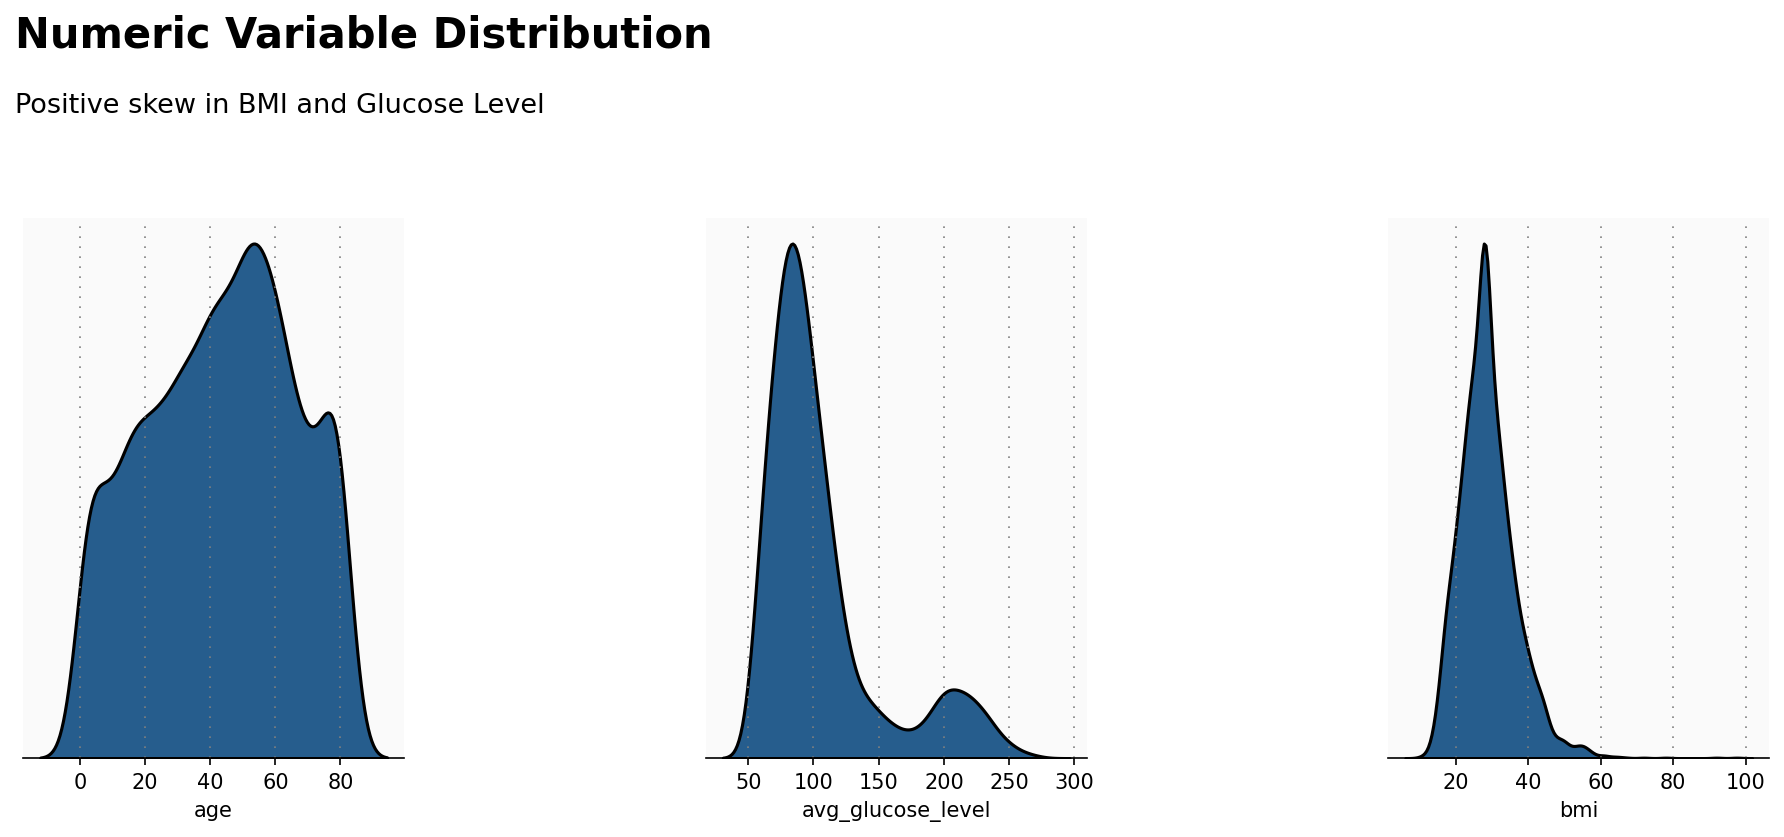

In [8]:
# Create the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(12, 6), dpi=150)

# Set background color and remove y-axis labels/spines
for ax in axes:
    ax.set_facecolor("#fafafa")
    ax.tick_params(axis='y', left=False)
    ax.get_yaxis().set_visible(False)
    for s in ["top", "right", "left"]:
        ax.spines[s].set_visible(False)

# Plot the KDE for each variable
conts = ['age', 'avg_glucose_level', 'bmi'] 
for ax, var in zip(axes, conts):
    sns.kdeplot(df[var], ax=ax, color='#0f4c81', shade=True, linewidth=1.5, ec='black', alpha=0.9)
    ax.grid(which='major', axis='x', color='gray', linestyle=':', dashes=(1,5))
    ax.set_xlabel(var)

# Add annotations
axes[0].text(-20, 0.022, 'Numeric Variable Distribution', fontsize=20, fontweight='bold')
axes[0].text(-20, 0.02, 'Positive skew in BMI and Glucose Level', fontsize=13, fontweight='light')

# Show the plot
plt.tight_layout()
plt.show()


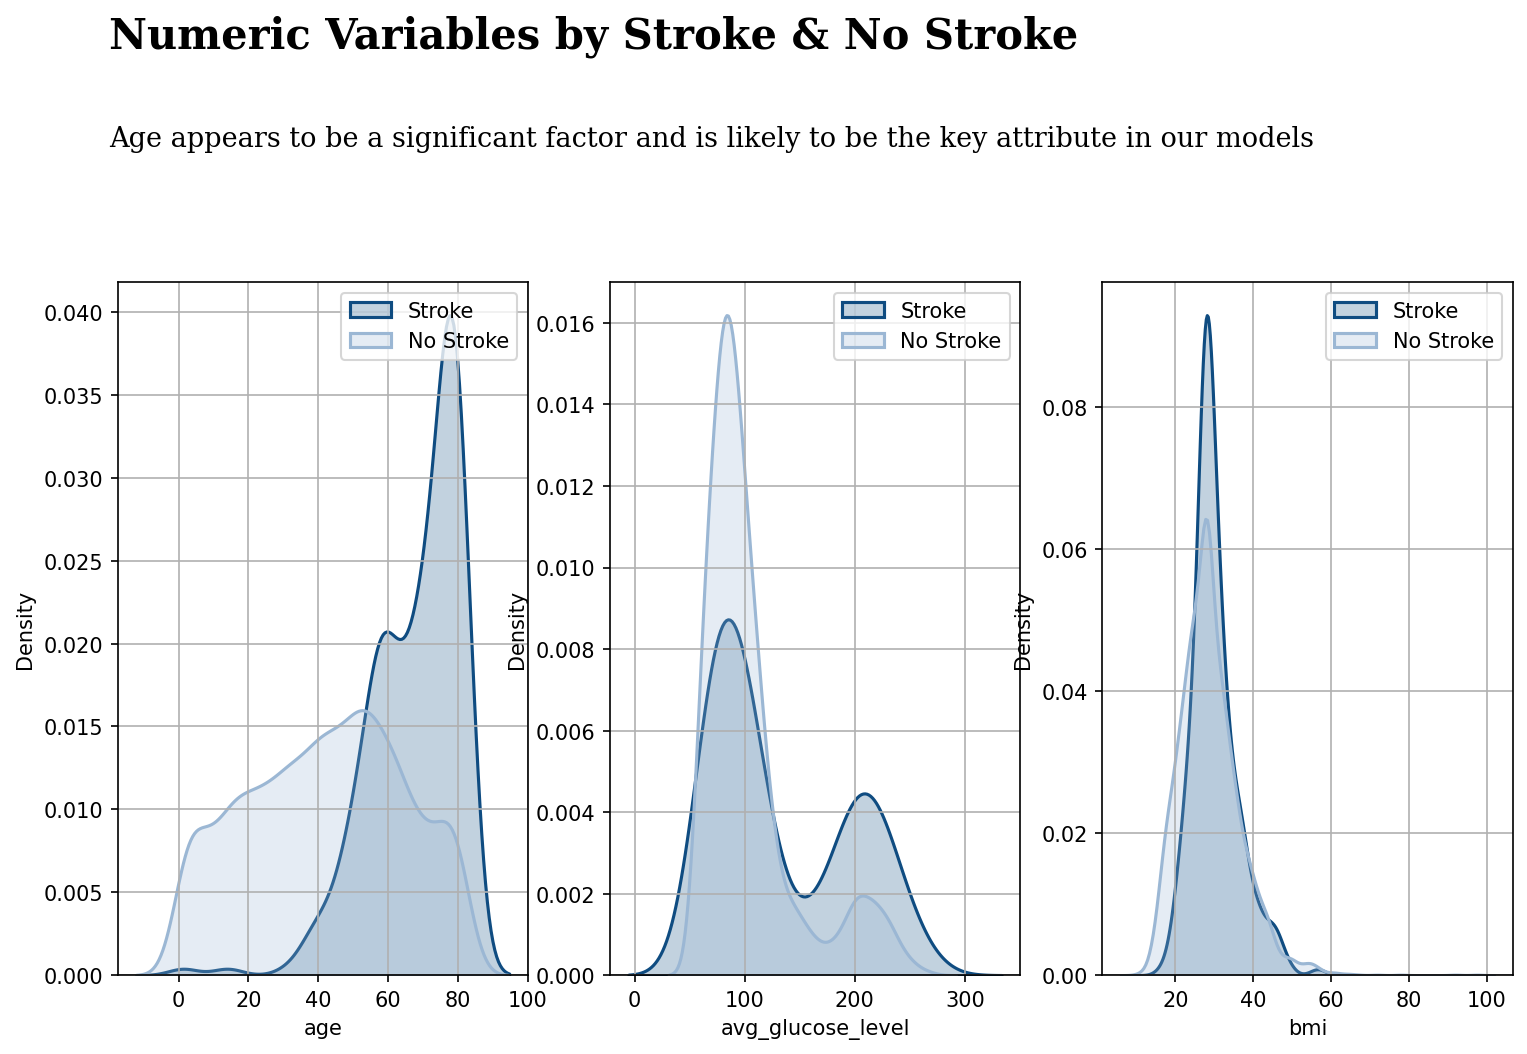

In [9]:
# Define the stroke and non-stroke groups
s = df[df['stroke'] == 1]  # Stroke group
ns = df[df['stroke'] == 0]  # No stroke group

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 6), dpi=150)

# Plot KDE for each feature
features = ['age', 'avg_glucose_level', 'bmi']  # List of features to plot

for ax, feature in zip(axes, features):
    # Plot KDE for stroke and non-stroke groups
    sns.kdeplot(s[feature], ax=ax, color='#0f4c81', shade=True, linewidth=1.5, label='Stroke')
    sns.kdeplot(ns[feature], ax=ax, color='#9bb7d4', shade=True, linewidth=1.5, label='No Stroke')
    
    ax.set_xlabel(feature)  # Set feature name as x-axis label
    ax.legend()  # Show legend
    ax.grid(True)  # Display grid

axes[0].text(-20, 0.056, 'Numeric Variables by Stroke & No Stroke', fontsize=20, fontweight='bold', fontfamily='serif')
axes[0].text(-20, 0.05, 'Age appears to be a significant factor and is likely to be the key attribute in our models', 
         fontsize=13, fontweight='light', fontfamily='serif')
plt.show()

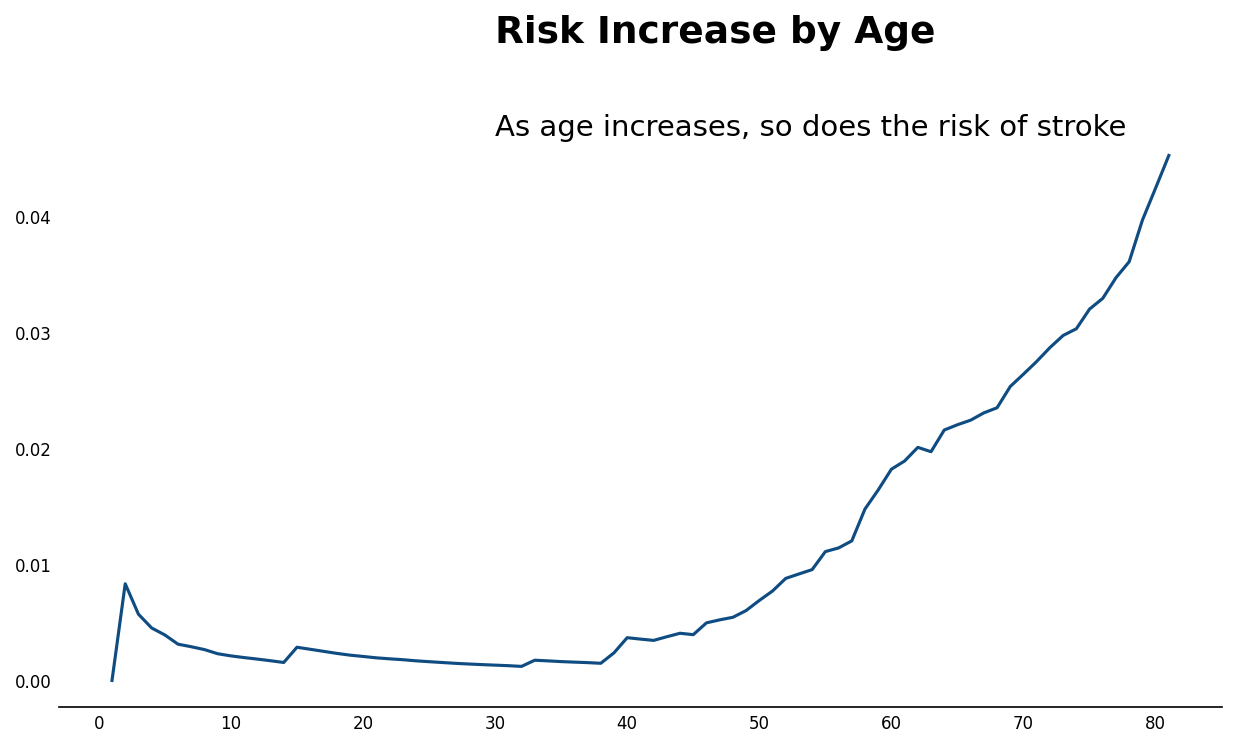

In [10]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 5), dpi=150)

# Prepare data: Calculate stroke risk by age
age_groups = range(int(df['age'].min()), int(df['age'].max()))
risk = [df[df['age'] < age]['stroke'].mean() for age in age_groups]

# Plot the data
sns.lineplot(x=age_groups, y=risk, color='#0f4c81', ax=ax)

# Customize plot appearance
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=8, length=0)

# Add text annotations
ax.text(30, 0.055, 'Risk Increase by Age', fontsize=18, fontweight='bold')
ax.text(30, 0.047, 'As age increases, so does the risk of stroke', fontsize=14)

plt.show()

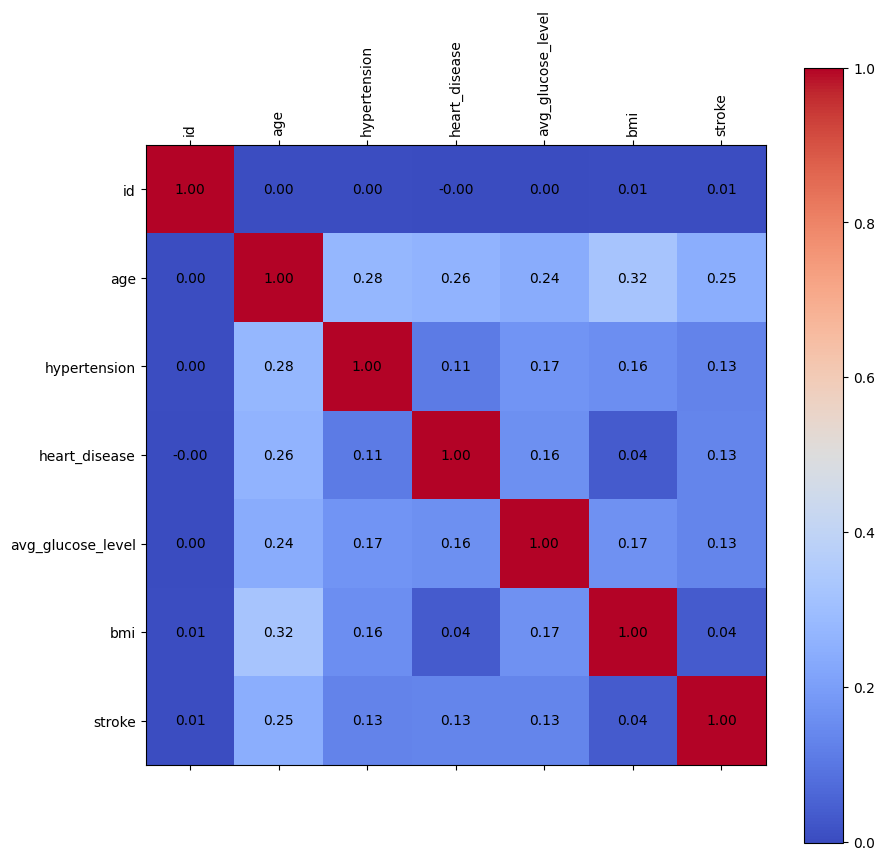

In [11]:
correlation = df.select_dtypes(include=['float64', 'int64']).corr()

# Set figure size
rcParams['figure.figsize'] = 10, 10

# Plot correlation matrix
plt.matshow(correlation, cmap='coolwarm', fignum=1)
plt.xticks(np.arange(correlation.shape[1]), correlation.columns, rotation=90)
plt.yticks(np.arange(correlation.shape[0]), correlation.columns)
plt.colorbar()
for (i, j), val in np.ndenumerate(correlation.values):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')
plt.show()

# Model Preparation

In [12]:
#Encoding categorical variables
df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
df['work_type'] = df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)
df['ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0}).astype(np.uint8)
df['smoking_status'] = df['smoking_status'].replace({'never smoked': 0,'formerly smoked': 1,'smokes': 2,'Unknown': -1 }).astype(np.int8)




In [13]:
X = df.drop(columns=['stroke']) 
y = df['stroke']  # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (3577, 11)
X_test shape: (1533, 11)
y_train shape: (3577,)
y_test shape: (1533,)


In [14]:
print(df.dtypes) 


id                     int64
gender                 uint8
age                  float64
hypertension           int64
heart_disease          int64
ever_married           uint8
work_type              uint8
Residence_type         uint8
avg_glucose_level    float64
bmi                  float64
smoking_status          int8
stroke                 int64
dtype: object


# Model Building 

# KNN Algorithm

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[1452    5]
 [  74    2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.29      0.03      0.05        76

    accuracy                           0.95      1533
   macro avg       0.62      0.51      0.51      1533
weighted avg       0.92      0.95      0.93      1533


Accuracy Score:
0.9484670580560991


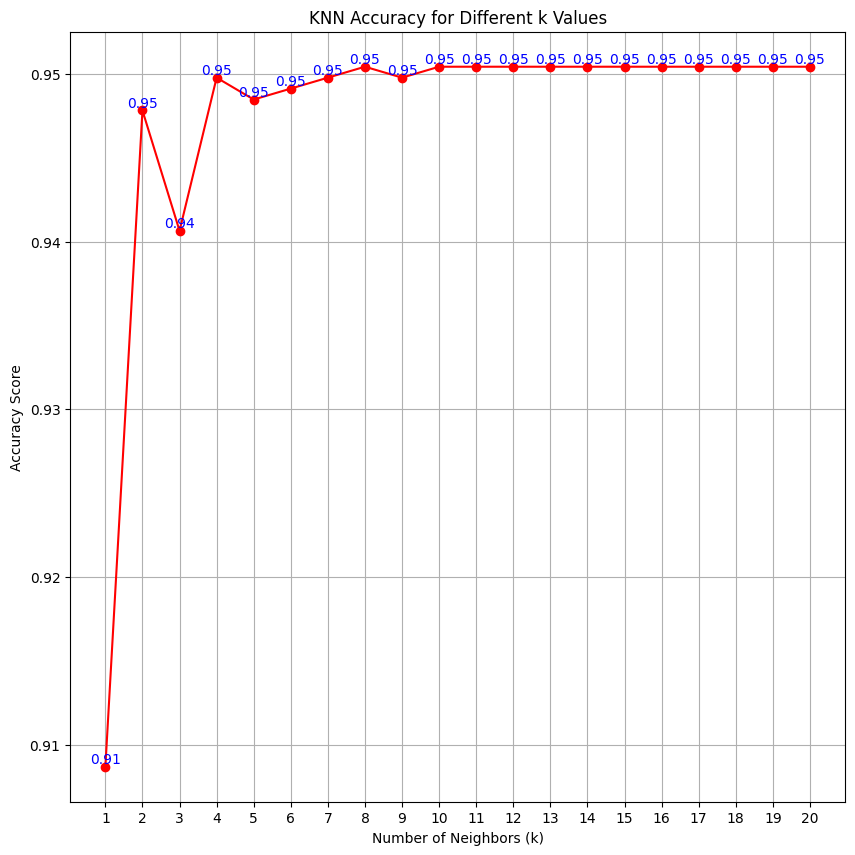

In [16]:
accuracies = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred)) 

plt.plot(range(1, 21), accuracies, color='red', marker='o')

for i, accuracy in enumerate(accuracies):
    plt.text(i + 1, accuracy, f"{accuracy:.2f}", color='blue', ha='center', va='bottom')

plt.xticks(range(1, 21))
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.title('KNN Accuracy for Different k Values')
plt.grid(True)
plt.show()

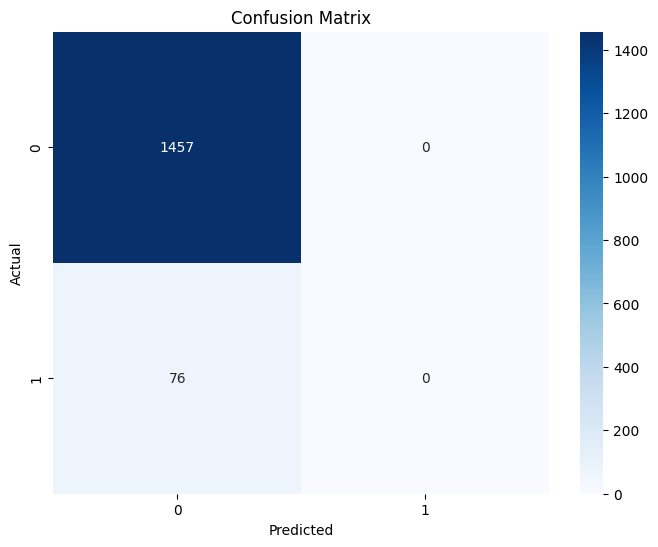

In [17]:
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression

In [20]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_model_prediction = logistic_model.predict(X_test)
print(accuracy_score(y_test, logistic_model_prediction))
print(classification_report(y_test, logistic_model_prediction))

print('Accuracy Score: ',accuracy_score(y_test, logistic_model_prediction))
print('F1 Score: ',f1_score(y_test, logistic_model_prediction))

0.9504240052185258
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.50      0.01      0.03        76

    accuracy                           0.95      1533
   macro avg       0.73      0.51      0.50      1533
weighted avg       0.93      0.95      0.93      1533

Accuracy Score:  0.9504240052185258
F1 Score:  0.02564102564102564


# Random Forest

Text(0.5, 1.0, 'RandomForestClassifier socres for different number of estimators')

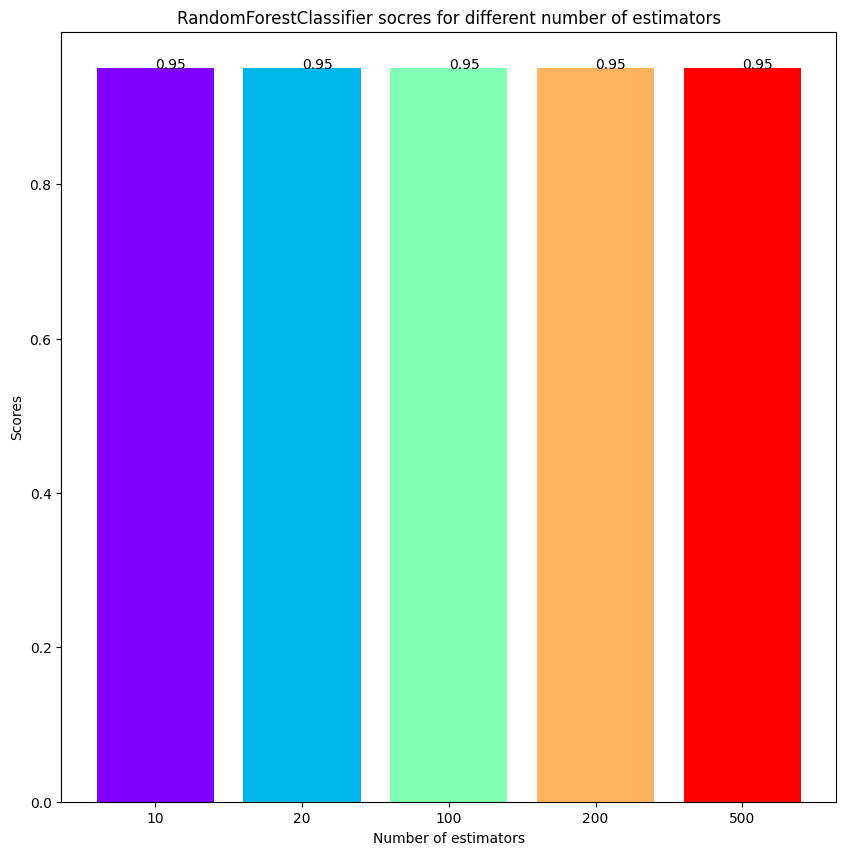

In [23]:
rf_scores = []
estimators = [10, 20, 100, 200, 500]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=i, random_state=0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(round(rf_classifier.score(X_test, y_test), 2))
    
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color=colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
    
plt.xticks(ticks=[i for i in range(len(estimators))], labels=[str(estimator) for estimator in estimators])
plt.xlabel("Number of estimators")
plt.ylabel("Scores")
plt.title("RandomForestClassifier socres for different number of estimators")